# 2.2 Weather RNN on Scaled Data Set

## Contents
### 1. Import libraries and data sets
### 2. Reshape data sets
### 3. Split data
### 4. Create first Keras layered model (scenario 1)
### 5. Change hyperparameters - Final scenario

## 1. Import libraries and data sets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Dropout
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

2025-11-04 13:51:42.448643: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
path = r'/Users/susanwang/Documents/CF_ML/ML_Project'

In [3]:
weather_df = pd.read_csv(os.path.join(path, 'Data Sets', 'scaled_cleaned_weather.csv'), index_col=False)

In [4]:
weather_df.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,0.660514,0.826097,-0.001949,-1.101066,-0.265148,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,...,-1.299744,-0.806427,-0.088407,0.372147,-0.668215,-0.519743,-0.752237,1.205492,0.095234,1.544023
1,0.244897,0.735760,-0.001949,-1.058108,1.658760,-0.810126,-0.582946,-0.462450,-0.569988,0.652846,...,-1.262455,-1.042055,0.503361,-0.829285,-0.548046,-0.629054,-0.407141,0.371461,0.067319,-0.712374
2,1.076130,1.277781,-0.001949,-1.251420,0.155707,-1.065304,-0.257010,-0.186545,-0.592896,0.652846,...,-0.432779,-1.136306,-0.396127,-1.009500,-0.067372,0.054135,-0.177078,1.205492,0.132454,-0.273630
3,-1.001953,1.458455,-0.001949,-0.821838,-0.445514,-0.114186,-0.555784,-0.385810,-0.512718,1.396557,...,0.387574,-1.183432,0.669056,-1.039536,-0.998679,-0.164486,-0.838511,0.371461,0.418586,1.544023
4,0.244897,1.729466,-0.001949,-0.746661,-0.164944,0.187388,-1.003946,-1.075573,-1.039603,1.396557,...,1.729970,-0.794645,-0.490810,0.672505,-1.509396,-1.339569,-1.471186,0.788477,0.388345,1.418668


In [5]:
weather_df.shape

(22950, 135)

In [6]:
answers_df = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col=False)

In [7]:
answers_df.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# remove date column
answers_df.drop(columns=['DATE'], inplace=True)

In [9]:
answers_df.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
answers_df.shape

(22950, 15)

## 2. Reshape sets

Stations

In [11]:
stations = list()

columns = weather_df.columns.tolist()
for col in columns:
    name = col.split('_', 1)[0]
    if name not in stations:
        stations.append(name)

print(len(stations))
print(stations)

15
['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


Observation types

In [12]:
observations = list()

for col in columns:
    name = col.split('_', 1)[1]
    if name not in observations:
        observations.append(name)

print(len(observations))
print(observations)

9
['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


In [13]:
# Get X data set (weather_df) to shape of (22950, 15, 9)
# how do I ensure that the reshaping of the arrays correspond correctly to the 15 stations and 9 observations?

In [14]:
weather_arr = np.array(weather_df)
weather_arr

array([[ 6.60513663e-01,  8.26096599e-01, -1.94863388e-03, ...,
         1.20549184e+00,  9.52340493e-02,  1.54402321e+00],
       [ 2.44896945e-01,  7.35759689e-01, -1.94863388e-03, ...,
         3.71461490e-01,  6.73187494e-02, -7.12373579e-01],
       [ 1.07613038e+00,  1.27778115e+00, -1.94863388e-03, ...,
         1.20549184e+00,  1.32454449e-01, -2.73629759e-01],
       ...,
       [-5.86336492e-01,  1.30644098e-02,  7.16401992e-01, ...,
        -8.79584032e-01, -1.43225559e-04,  7.29213258e-01],
       [-1.70719774e-01,  3.74412049e-01,  4.87141154e-01, ...,
        -8.79584032e-01, -1.43225559e-04,  1.29331245e+00],
       [-1.70719774e-01,  7.35759689e-01,  1.96744092e-01, ...,
        -8.79584032e-01, -1.43225559e-04,  1.48134552e+00]])

In [15]:
weather_arr.shape

(22950, 135)

In [16]:
X = weather_arr.reshape(-1, 15, 9)
X

array([[[ 6.60513663e-01,  8.26096599e-01, -1.94863388e-03, ...,
         -5.28623012e-01, -8.45651922e-01, -4.78356271e-01],
        [-1.20643263e+00,  9.05270489e-01,  3.21770762e-01, ...,
         -1.01687613e+00, -1.22021042e+00, -9.49202784e-01],
        [-2.55240242e-01, -1.00976762e-02, -5.87602906e-03, ...,
         -1.09916317e+00, -1.11943125e+00, -1.13683915e+00],
        ...,
        [ 9.52340493e-02, -1.24444008e+00, -6.49855996e-01, ...,
         -6.33220094e-02, -6.01023076e-02, -3.46465175e-03],
        [-1.07912619e+00,  4.79130672e-01, -1.01329461e+00, ...,
         -4.43700743e-01,  7.61754381e-01, -1.29974368e+00],
        [-8.06426690e-01, -8.84074022e-02,  3.72146925e-01, ...,
          1.20549184e+00,  9.52340493e-02,  1.54402321e+00]],

       [[ 2.44896945e-01,  7.35759689e-01, -1.94863388e-03, ...,
         -5.82945633e-01, -4.62450189e-01, -5.69988328e-01],
        [ 6.52845676e-01,  1.11911758e+00,  1.68378867e-02, ...,
         -1.10766931e+00, -8.18701592e

In [17]:
X.shape

(22950, 15, 9)

In [18]:
y = np.array(answers_df)
y.shape

(22950, 15)

## 3. Split data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15, 9)
(5738, 15, 9)
(17212, 15)
(5738, 15)


## 4. Create first Keras layered model

### Scenario 1

In [21]:
len(X_train[0])

15

In [22]:
len(X_train[0][0])

9

In [23]:
len(y_train[0])

15

In [57]:
epochs = 30
batch_size = 16
n_hidden = 8

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(y_train[0])

# model = Sequential()
# model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# model.add(Dropout(0.5))
# model.add(Dense(n_classes, activation='sigmoid'))
# produces userwarning - new keras update recommends using Input in the first layer of the model

model = Sequential([
    Input(shape=(timesteps, input_dim)),   # 👈 new Input layer
    LSTM(n_hidden),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')  # or 'softmax' depending on your task
])

In [58]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Epoch 1/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1491 - loss: 9.6965 - val_accuracy: 0.1697 - val_loss: 8.9361
Epoch 2/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1473 - loss: 9.8306 - val_accuracy: 0.1328 - val_loss: 9.0762
Epoch 3/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2243 - loss: 9.9190 - val_accuracy: 0.2712 - val_loss: 9.1523
Epoch 4/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2665 - loss: 9.9544 - val_accuracy: 0.2713 - val_loss: 9.2226
Epoch 5/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2838 - loss: 9.9506 - val_accuracy: 0.2708 - val_loss: 9.3034
Epoch 6/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2881 - loss: 9.9690 - val_accuracy: 0.2698 - val_loss: 9.3965
Epoch 7/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2935 - loss: 10.0444 - val_accuracy: 0.2726 - val_loss: 9.4813
Epoch 8/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2999 - loss: 10.0833 

### Confusion Matrix - scenario 1

In [27]:
locations = list({x.split("_")[0] for x in weather_df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [28]:
# define y_pred
y_pred = pd.DataFrame(model.predict(X_test))
y_pred = y_pred.astype('int32')
y_pred

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5734,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5735,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
y_test_df = pd.DataFrame(y_test)
y_test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0
3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0
5734,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5735,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0
5736,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


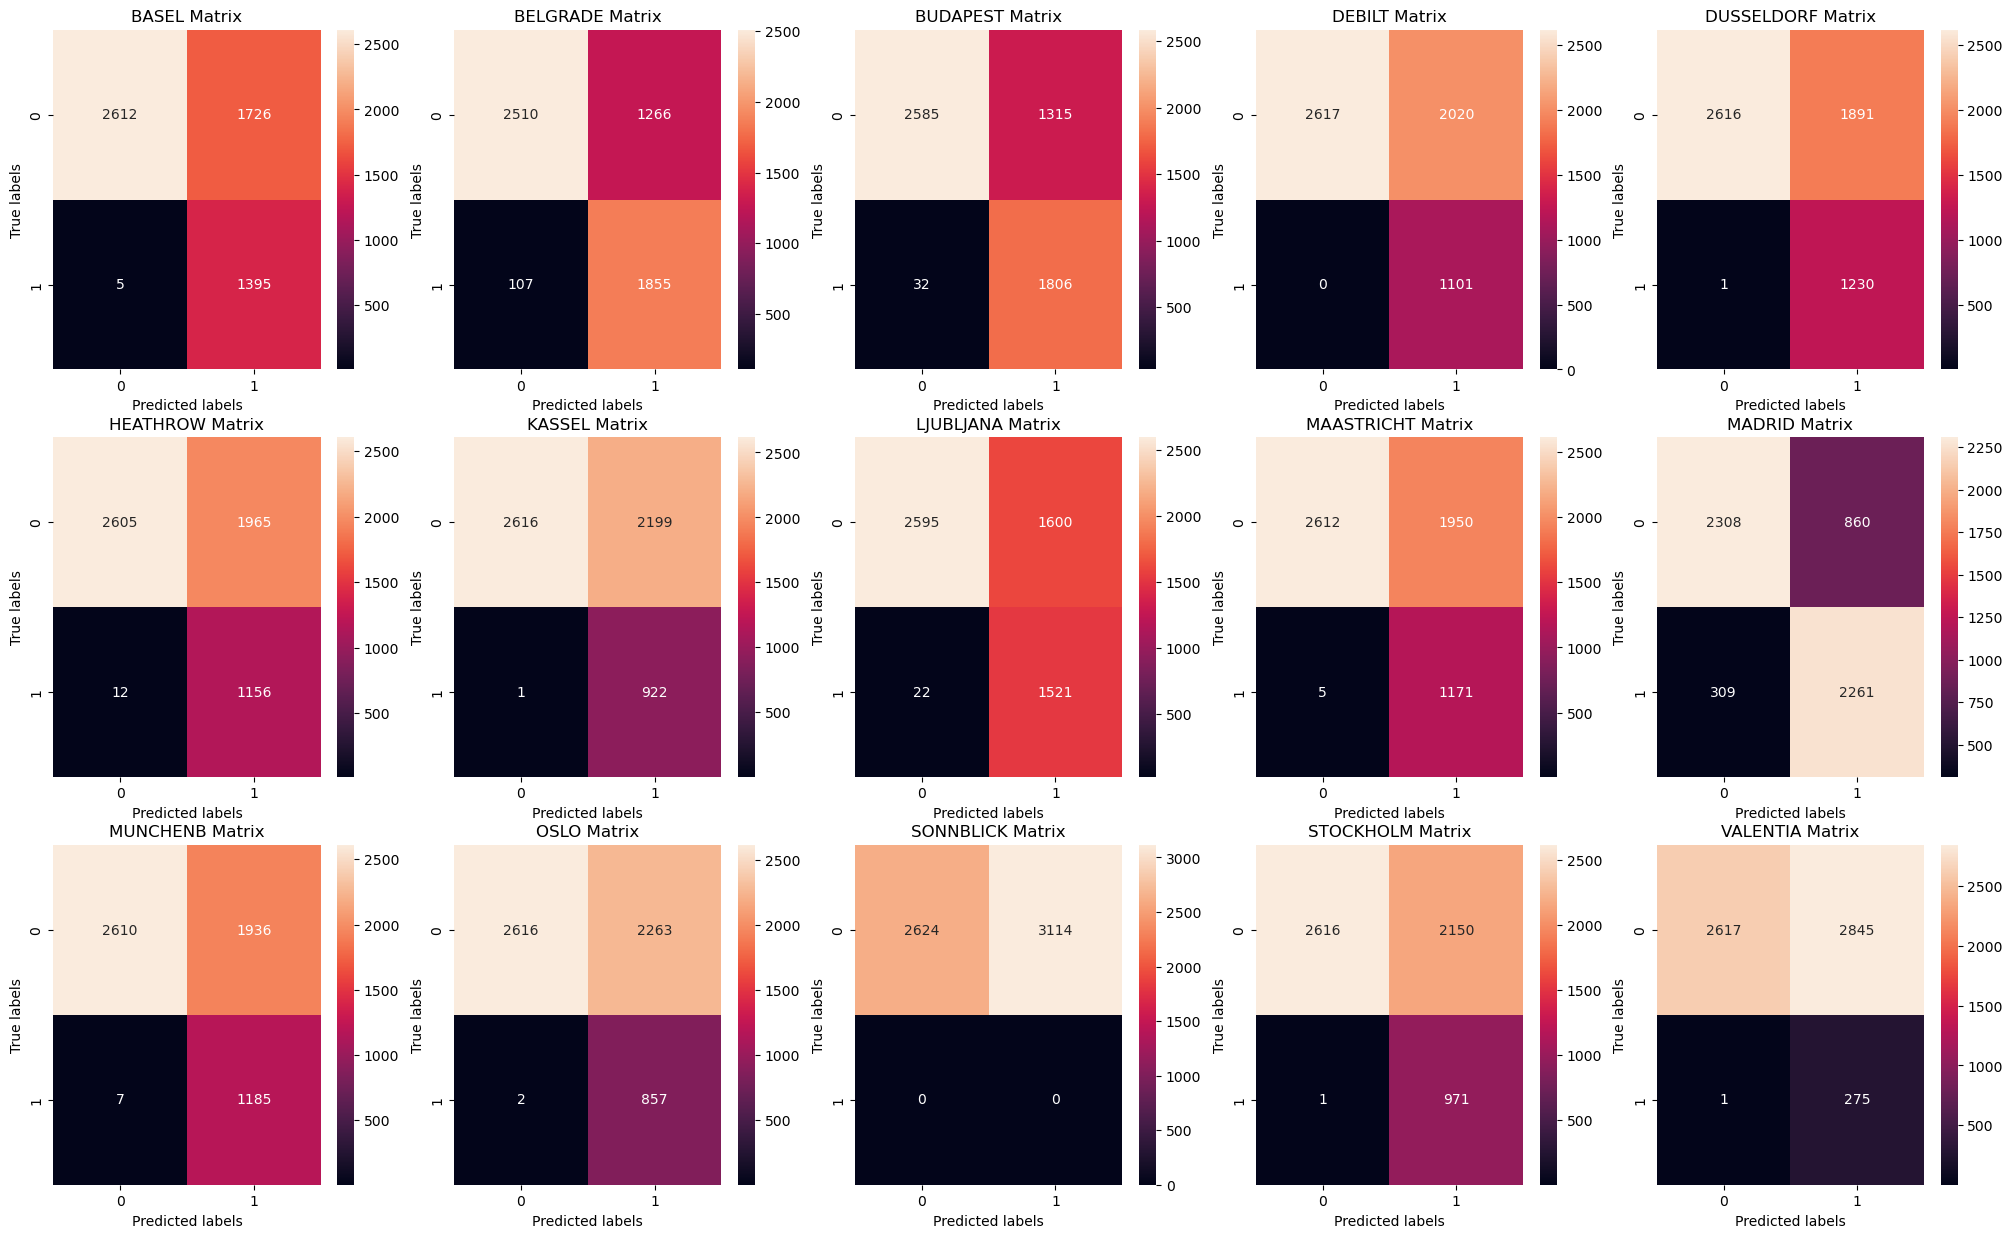

In [30]:
# key = "_pleasant_weather"
# stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
# labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        # cm = confusion_matrix(y_test_df.loc[:,name+key], y_pred[:,count])
        cm = confusion_matrix(y_test_df.loc[:, count], y_pred.loc[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

## 5. Changing hyperparameters

### Use below cells to experiment with hyperparameters until arriving at optimal results

In [52]:
epochs = 30
batch_size =64
n_hidden = 32

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(y_train[0])

model = Sequential([
    Input(shape=(timesteps, input_dim)),  
    LSTM(n_hidden),
    Dropout(0.5),
    Dense(n_classes, activation='sigmoid') ])

In [53]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [54]:
model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Epoch 1/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0666 - loss: 11.2328 - val_accuracy: 0.0328 - val_loss: 9.8722
Epoch 2/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1142 - loss: 11.6678 - val_accuracy: 0.2224 - val_loss: 9.8233
Epoch 3/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2413 - loss: 11.5963 - val_accuracy: 0.2621 - val_loss: 9.7902
Epoch 4/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2749 - loss: 11.5740 - val_accuracy: 0.2665 - val_loss: 9.7284
Epoch 5/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2749 - loss: 11.5261 - val_accuracy: 0.2696 - val_loss: 9.6353
Epoch 6/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2807 - loss: 11.4562 - val_accuracy: 0.2684 - val_loss: 9.5844
Epoch 7/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2771 - loss: 11.3459 - val_accuracy: 0.2700 - val_loss: 9.4874
Epoch 8/30
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2787 - loss: 11.3148 - val_accu

### Confusion Matrix - final scenario

In [55]:
y_pred = pd.DataFrame(model.predict(X_test))
y_pred = y_pred.astype('int32')
y_pred

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5734,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5735,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


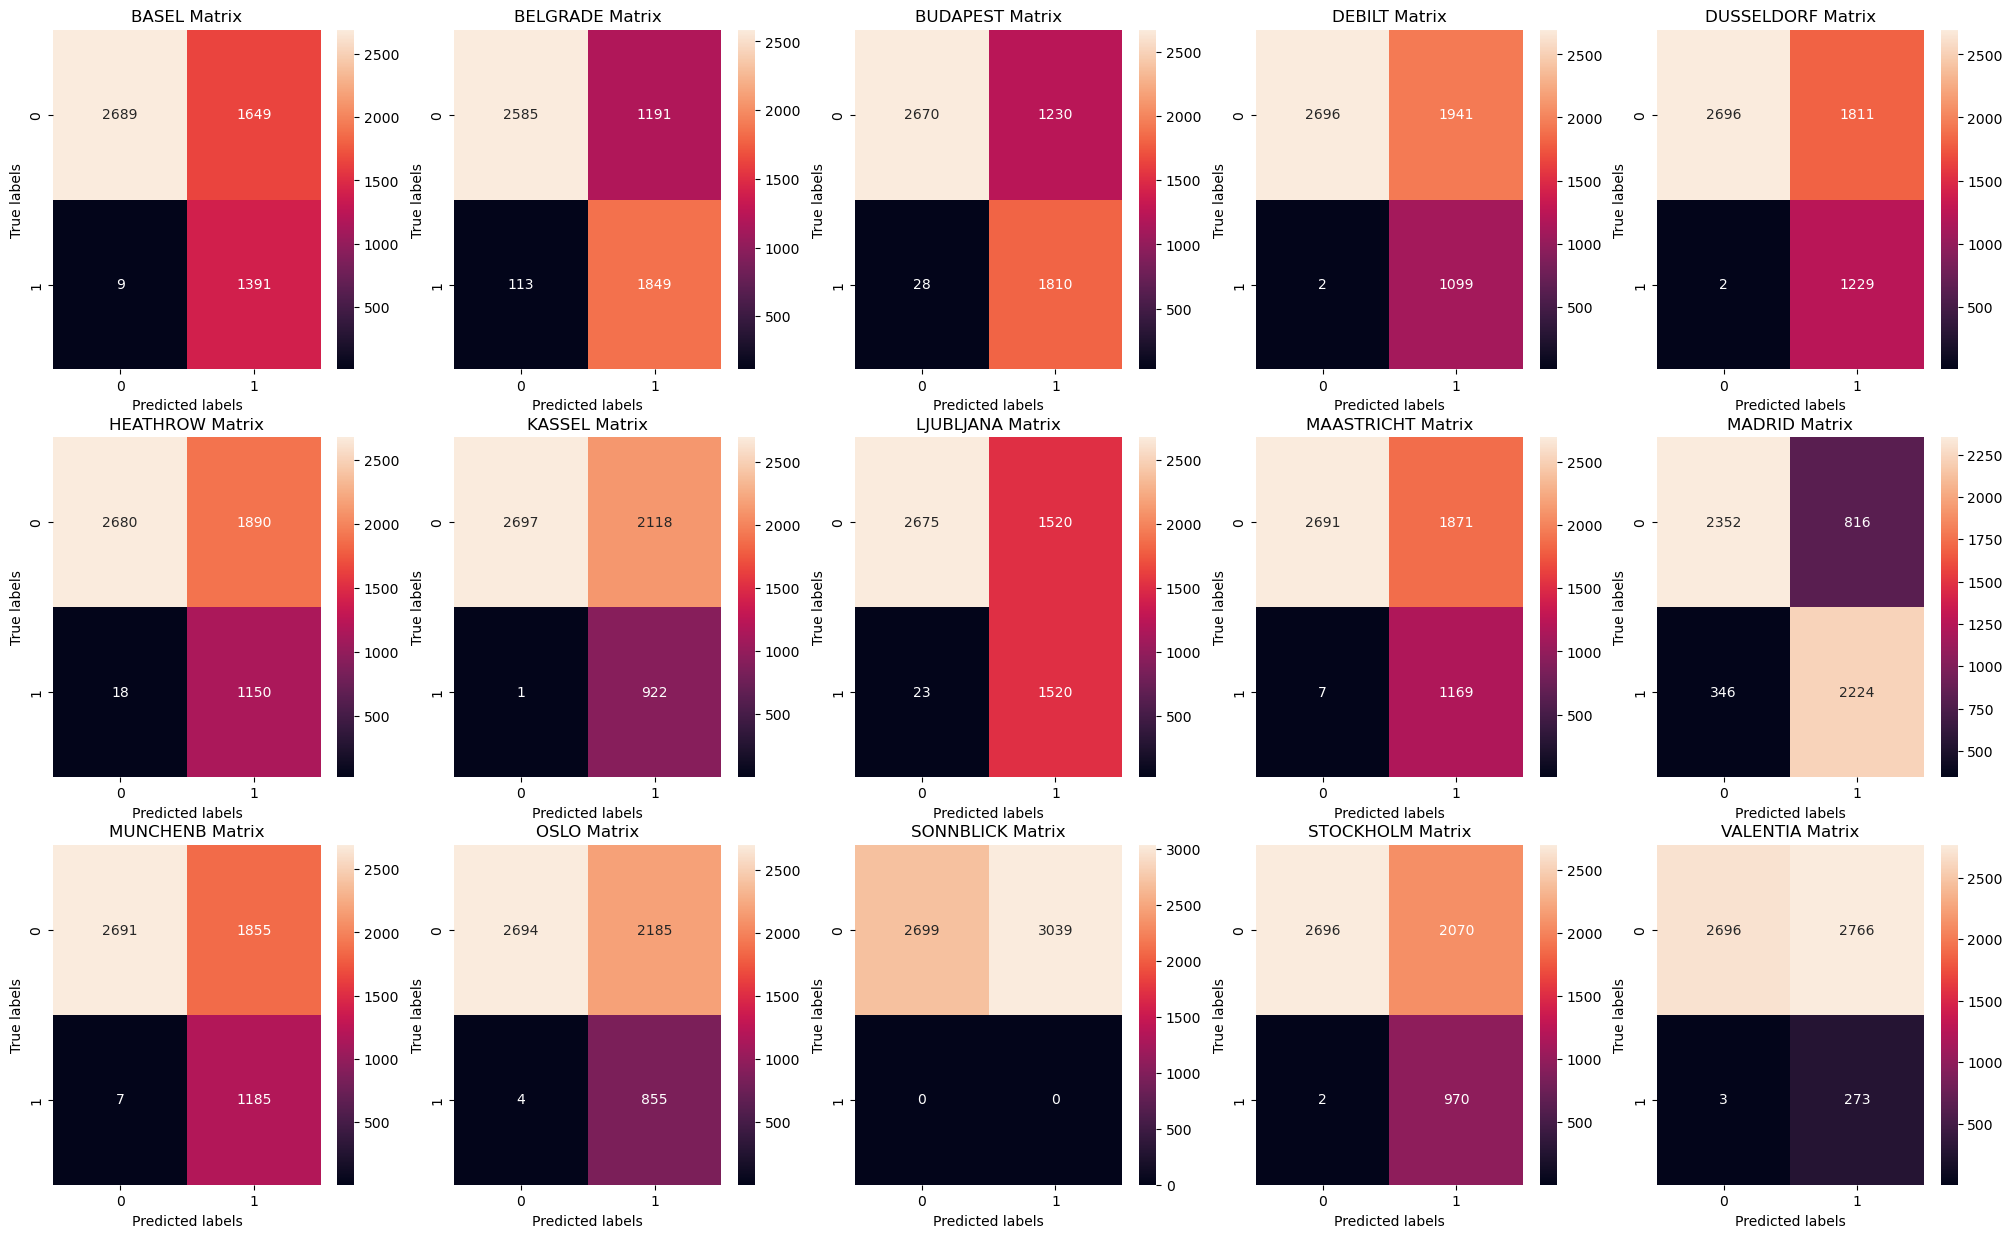

In [56]:
# key = "_pleasant_weather"
# stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
# labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        # cm = confusion_matrix(y_test_df.loc[:,name+key], y_pred[:,count])
        cm = confusion_matrix(y_test_df.loc[:, count], y_pred.loc[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1